In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

#import seaborn as sns

In [18]:
import numpy as np
import h5py

from corner import corner
#from getdist import plots, MCSamples
#import getdist
from chainconsumer import ChainConsumer
from glob import glob

In [3]:
#test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'
test_files = sorted(glob('../preds/gupta_net_smooth_1.0*10.hdf5'))

In [4]:
print test_files

['../preds/gupta_net_smooth_1.0_noise_0.3_10.hdf5']


In [5]:
#test_names = ['Adv. Resnet', 'Shuffled Resnet', 'Resnet', 'Gupta']
#test_names = ['Adv. Resnet', 'Resnet', 'Gupta']
test_names = ['Shuffled Gupta' for i in xrange(1)]

In [6]:
def get_outputs(test_path):
    outputs = np.zeros((50, 2, 36**2))
    truths = np.zeros((50, 2))
    with h5py.File(test_path, 'r') as f:
        for i, key in enumerate(f):
            #print i,key
            #print i,
            split_key = key.split('_')
            truths[i] = float(split_key[1]), float(split_key[3])
            #print len(f[key].keys())
            
            for j, m in enumerate(f[key].keys()):
                #print j
                outputs[i,:,j] = f[key][m][()]
    sorted_idxs = np.argsort(truths[:,0])
    return outputs[sorted_idxs], truths[sorted_idxs]

In [7]:
plot_idx = 0
outputs, truths = get_outputs(test_files[plot_idx])

In [8]:
mean_preds = outputs.mean(axis=2)
std_preds = outputs.std(axis=2)

In [9]:
names = [r'$\Omega_m$', r'$\sigma_8$']

<function matplotlib.pyplot.tight_layout>

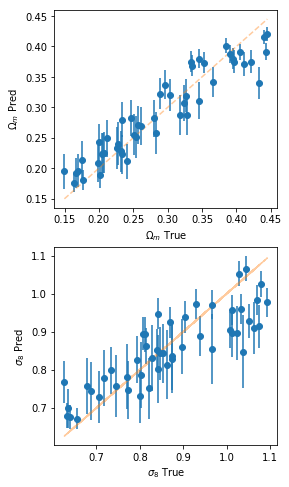

In [10]:
fig, axes = plt.subplots(2,1, figsize = (4,8))
for i, (n, ax) in enumerate(zip(names, axes)):
    ax.errorbar(truths[:,i], mean_preds[:,i], yerr = std_preds[:,i], fmt='o')
    ax.plot(truths[:,i], truths[:,i], ls = '--', alpha = 0.4)
    ax.set_xlabel('%s True'%n)
    ax.set_ylabel('%s Pred'%n)
plt.tight_layout

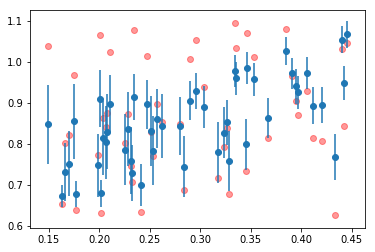

In [11]:
#fig, axes = plt.subplots(2,1, figsize = (4,8))
#for i, (n, ax) in enumerate(zip(names, axes)):
plt.errorbar(truths[:,0], mean_preds[:,1], yerr = std_preds[:,i], fmt='o')
plt.scatter(truths[:,0], truths[:,1], alpha = 0.4, color = 'r')
#ax.set_xlabel('%s True'%n)
#ax.set_ylabel('%s Pred'%n)
#plt.tight_layout

In [12]:
def rmse(preds, truth):
    return np.sqrt(np.mean((truth-preds.T)**2, axis =0))

In [13]:
print 'RMSE', test_names[plot_idx]
np.mean(np.array([rmse(outputs[i], truths[i]) for i in xrange(50)])\
                 , axis =0)

RMSE Shuffled Gupta


array([0.03765468, 0.09234129])

In [14]:
center_point = truths.mean(axis = 0)

In [15]:
closest_to_center_idx = np.argmin(np.sum((truths - center_point)**2, axis=1))

In [16]:
print closest_to_center_idx, truths[closest_to_center_idx]

24 [0.279925 0.846988]


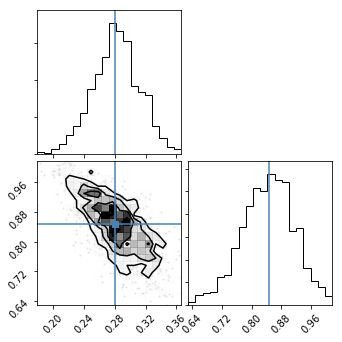

In [20]:
corner(outputs[closest_to_center_idx].T, truths= truths[closest_to_center_idx].T);